# Node embedding using the karateclub package and the Karate Club graph

In this notebook, we will generate node embedding using algorithms relying on the graph ajacency matrix. So we are first going to generate this sparse matrix from a Neo4j graph.

In our example, the graph is quite small and contains only 34 nodes (the Karate Club graph). But in a real life scenario, you will probably have much more nodes. That's the reason why we are going to use scipy sparse matrices to represent the adjacency matrix.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from neo4j import GraphDatabase

import networkx as nx

from karateclub import HOPE, LaplacianEigenmaps

from sklearn.decomposition import PCA

## Creating a  `networkx` graph object from Neo4j

In [2]:
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "<YOUR_PASSWORD>"), encrypted=False)

In [3]:
cypher = """
MATCH (n:Node)-[r:LINK]-(m:Node)
RETURN n.id as source, m.id as target, count(r) as weight
"""

In [4]:
with driver.session() as session:
    res = session.run(cypher)

In [5]:
data = pd.DataFrame.from_records(res.data())
data.head()

,source,target,weight
0,0,8,1
1,0,6,1
2,0,13,1
3,0,12,1
4,0,17,1


In [6]:
G = nx.from_pandas_edgelist(data)

In [7]:
np.set_printoptions(threshold=2000)  # print the full numpy array without truncation 
                                     # (our adjacency matrix contains less than 2000 elements)

a = nx.adjacency_matrix(G).toarray()
print(a)

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 

## HOPE


### Building and training the model


In [8]:
hope = HOPE(dimensions=10)
hope.fit(G)

In [9]:
embeddings = hope.get_embedding()
embeddings.shape

(34, 10)

In [10]:
embeddings[:5]

array([[-1.7254518 ,  0.95611817, -1.4232135 , -1.9254365 , -2.390928  ,
        -1.7254518 ,  0.9561189 , -1.4232135 , -1.9254366 , -2.3909283 ],
       [-0.05299802,  0.3719547 , -0.56072927, -1.338532  , -1.7887659 ,
        -0.05299794,  0.37195477, -0.5607295 , -1.3385321 , -1.7887661 ],
       [-0.4145899 , -1.8592718 , -0.12232924, -0.6527912 , -2.1333416 ,
        -0.41458997, -1.8592712 , -0.12232904, -0.652791  , -2.133341  ],
       [ 0.169503  ,  0.06863824,  0.08625557, -1.2589302 , -1.420331  ,
         0.16950324,  0.06863841,  0.08625562, -1.2589298 , -1.4203309 ],
       [ 0.32123962, -0.16921864,  0.21572   , -0.6664154 , -0.51094335,
         0.32123956, -0.1692184 ,  0.21571998, -0.6664151 , -0.51094335]],
      dtype=float32)

### Visualizing the results

In [11]:
X = PCA(n_components=2).fit_transform(embeddings)

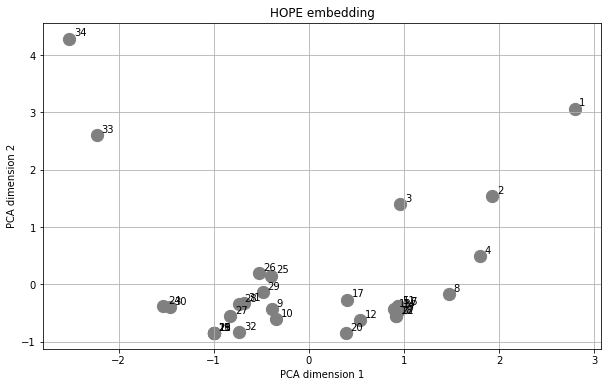

In [12]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], color="grey", s=150)

for k, x in enumerate(X):
    plt.annotate(str(k+1), (x[0]+0.05, x[1]+0.05))

plt.xlabel("PCA dimension 1")
plt.ylabel("PCA dimension 2")
plt.title("HOPE embedding")
plt.grid()
# plt.savefig("zkc_hope_embedding.png")
plt.show()

In [13]:
# define graph node positions
pos = {k: arr for k, arr in enumerate(X)}

# define labels based on ground truth communities
ground_truth_communities = {0: 1, 8: 0, 6: 1, 13: 1, 12: 1, 17: 0, 31: 0, 10: 1, 4: 1, 3: 1, 7: 1, 11: 1, 21: 1, 5: 1, 19: 1, 2: 1, 1: 1, 30: 0, 9: 0, 27: 1, 28: 0, 32: 0, 16: 1, 33: 0, 14: 0, 15: 0, 18: 0, 20: 0, 22: 0, 23: 0, 25: 0, 29: 0, 24: 0, 26: 0}
labels = [ground_truth_communities[k] for k in G.nodes()]

/home/estelle/Work/packt/book/Code/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


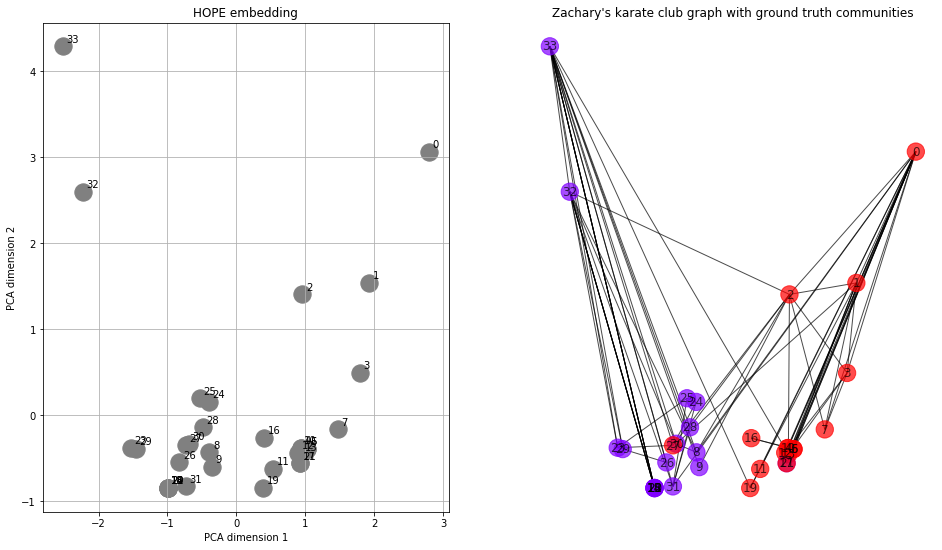

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.scatter(X[:,0], X[:,1], color="grey", s=300)
offset = 0.05
for k, x in enumerate(X):
    ax1.annotate(str(k), (x[0]+offset, x[1]+offset))

ax1.set_xlabel("PCA dimension 1")
ax1.set_ylabel("PCA dimension 2")
ax1.set_title("HOPE embedding")
ax1.grid()

nx.draw(G, pos, with_labels=True, node_color=labels, cmap=plt.cm.rainbow, node_size=300, alpha=0.7)
ax2.set_title("Zachary's karate club graph with ground truth communities")

# fig.savefig("zkc_hope_embedding_community.png")
fig.show()